In [1]:
import numpy as np
import pylab
import pandas as pd
from sklearn.preprocessing import StandardScaler
import time
from pydiffmap import diffusion_map as dm
from contrastive_loss import ContrastiveLoss 
import experiment_helpers

In [2]:
def splitData(data):
    np.random.shuffle(data)
    split = int(len(data)*0.8)
    train, test = np.split(data, [split])
    return train, test

In [3]:
def get_Data():
    penguins = pd.read_csv("https://github.com/allisonhorst/palmerpenguins/raw/5b5891f01b52ae26ad8cb9755ec93672f49328a8/data/penguins_size.csv")
    penguins = penguins.dropna()
    penguin_data = penguins[
    [
        "species_short",
        "culmen_length_mm",
        "culmen_depth_mm",
        "flipper_length_mm",
        "body_mass_g",
    ]
    ].values
    
    for i in range(len(penguin_data)):
        name = penguin_data[i][0]
        if name == 'Adelie':
            penguin_data[i][0] = 1
        elif name == 'Chinstrap':
            penguin_data[i][0] = 2
        else: 
            penguin_data[i][0] = 3
            
    train, test = splitData(penguin_data)
    
    train_data = [data[1:] for data in train]
    train_data = StandardScaler().fit_transform(train_data)
    test_data = [data[1:] for data in test]
    test_data = StandardScaler().fit_transform(test_data)
    train_label = [data[0] for data in train]
    test_label = [data[0] for data in test]
    return train_data, train_label, test_data, test_label

In [4]:
training_data,training_labels, testing_data, testing_labels = get_Data()

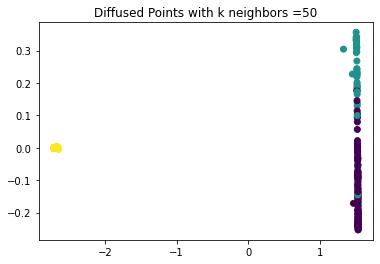

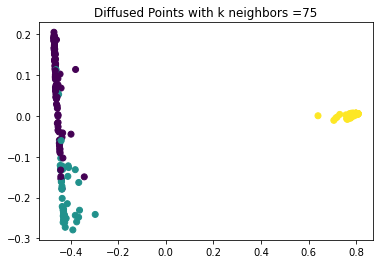

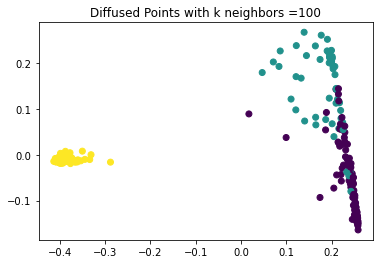

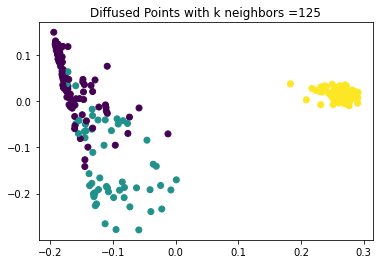

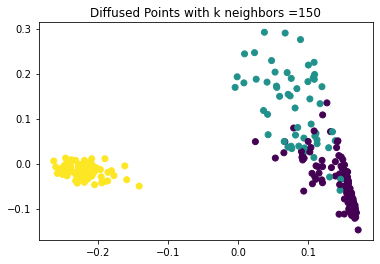

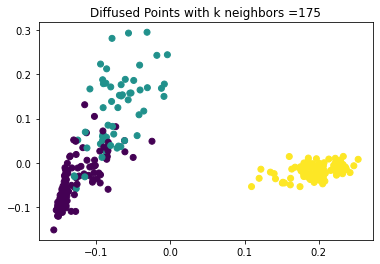

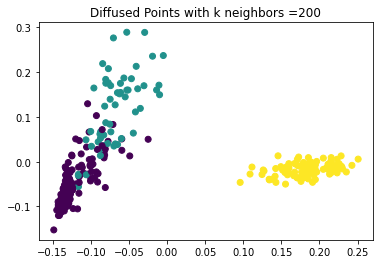

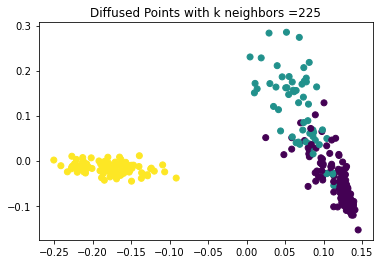

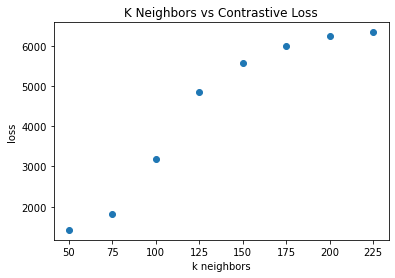

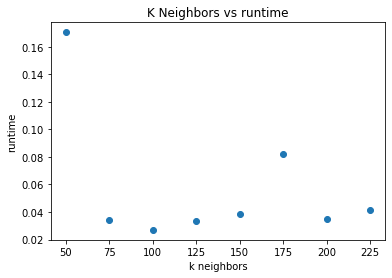

In [161]:
loss = ContrastiveLoss()
kvals = []
qualities = []
times = []
for i in range(50,250, 25):
    start = time.time()
    dmap=dm.DiffusionMap.from_sklearn(n_evecs = 2,epsilon = 1.0, alpha = 0.5, k=i)
    diffused_points = dmap.fit_transform(training_data)
    end = time.time()
    
    runtime = end - start
    times.append(runtime)
    kvals.append(i)
    losses = loss.get_loss(diffused_points, training_labels)
    qualities.append(losses)
    
    
    pylab.scatter(diffused_points[:,0], diffused_points[:,1], c=training_labels)        
    pylab.title('Diffused Points with k neighbors =' + str(i))
    pylab.show()
    
pylab.scatter(kvals, qualities)
pylab.title('K Neighbors vs Contrastive Loss')
pylab.xlabel('k neighbors')
pylab.ylabel('loss')
pylab.show()


pylab.scatter(kvals, times)
pylab.title('K Neighbors vs runtime')
pylab.xlabel('k neighbors')
pylab.ylabel('runtime')
pylab.show()

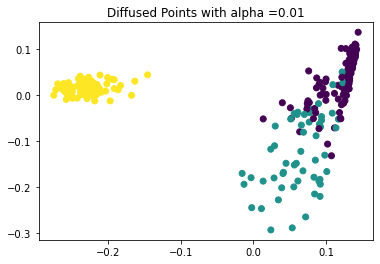

In [162]:
loss = ContrastiveLoss()
avals = []
qualities = []
times = []


alph = .01
start = time.time()
dmap=dm.DiffusionMap.from_sklearn(n_evecs = 2,epsilon = 1.0, alpha = alph, k=150)
diffused_points = dmap.fit_transform(training_data)
end = time.time()

runtime = end - start
times.append(runtime)
avals.append(alph)
losses = loss.get_loss(diffused_points, training_labels)
qualities.append(losses)
    
pylab.scatter(diffused_points[:,0], diffused_points[:,1], c=training_labels)        
pylab.title('Diffused Points with alpha =' + str(alph))
pylab.show()

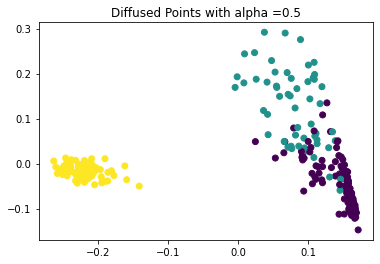

In [163]:
alph = .5
start = time.time()
dmap=dm.DiffusionMap.from_sklearn(n_evecs = 2,epsilon = 1.0, alpha = alph, k=150)
diffused_points = dmap.fit_transform(training_data)
end = time.time()

runtime = end - start
times.append(runtime)
avals.append(alph)
losses = loss.get_loss(diffused_points, training_labels)
qualities.append(losses)
    
pylab.scatter(diffused_points[:,0], diffused_points[:,1], c=training_labels)        
pylab.title('Diffused Points with alpha =' + str(alph))
pylab.show()

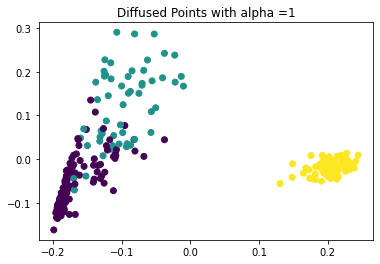

In [164]:
alph = 1
start = time.time()
dmap=dm.DiffusionMap.from_sklearn(n_evecs = 2,epsilon = 1.0, alpha = alph, k=150)
diffused_points = dmap.fit_transform(training_data)
end = time.time()

runtime = end - start
times.append(runtime)
avals.append(alph)
losses = loss.get_loss(diffused_points, training_labels)
qualities.append(losses)
    
pylab.scatter(diffused_points[:,0], diffused_points[:,1], c=training_labels)        
pylab.title('Diffused Points with alpha =' + str(alph))
pylab.show()

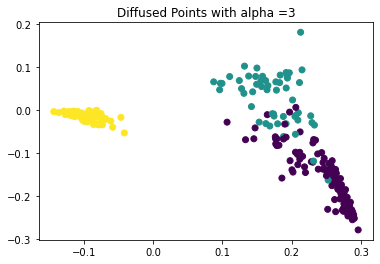

In [165]:
alph = 3
start = time.time()
dmap=dm.DiffusionMap.from_sklearn(n_evecs = 2,epsilon = 1.0, alpha = alph, k=150)
diffused_points = dmap.fit_transform(training_data)
end = time.time()

runtime = end - start
times.append(runtime)
avals.append(alph)
losses = loss.get_loss(diffused_points, training_labels)
qualities.append(losses)
    
pylab.scatter(diffused_points[:,0], diffused_points[:,1], c=training_labels)        
pylab.title('Diffused Points with alpha =' + str(alph))
pylab.show()

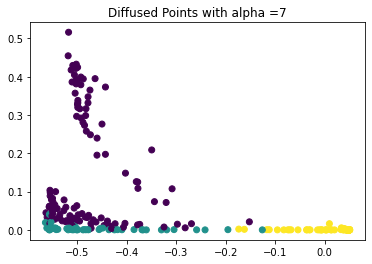

In [166]:
alph = 7
start = time.time()
dmap=dm.DiffusionMap.from_sklearn(n_evecs = 2,epsilon = 1.0, alpha = alph, k=150)
diffused_points = dmap.fit_transform(training_data)
end = time.time()

runtime = end - start
times.append(runtime)
avals.append(alph)
losses = loss.get_loss(diffused_points, training_labels)
qualities.append(losses)
    
pylab.scatter(diffused_points[:,0], diffused_points[:,1], c=training_labels)        
pylab.title('Diffused Points with alpha =' + str(alph))
pylab.show()

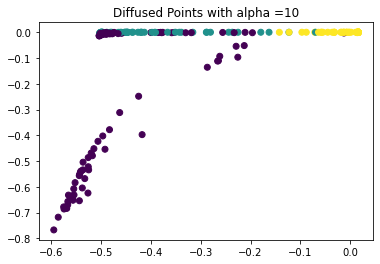

In [167]:
alph = 10
start = time.time()
dmap=dm.DiffusionMap.from_sklearn(n_evecs = 2,epsilon = 1.0, alpha = alph, k=150)
diffused_points = dmap.fit_transform(training_data)
end = time.time()

runtime = end - start
times.append(runtime)
avals.append(alph)
losses = loss.get_loss(diffused_points, training_labels)
qualities.append(losses)
    
pylab.scatter(diffused_points[:,0], diffused_points[:,1], c=training_labels)        
pylab.title('Diffused Points with alpha =' + str(alph))
pylab.show()

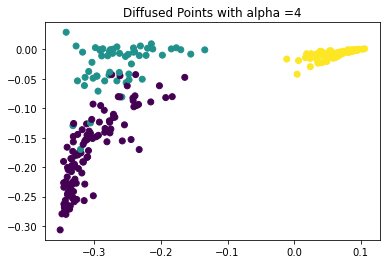

In [168]:
alph = 4
start = time.time()
dmap=dm.DiffusionMap.from_sklearn(n_evecs = 2,epsilon = 1.0, alpha = alph, k=150)
diffused_points = dmap.fit_transform(training_data)
end = time.time()

runtime = end - start
times.append(runtime)
avals.append(alph)
losses = loss.get_loss(diffused_points, training_labels)
qualities.append(losses)
    
pylab.scatter(diffused_points[:,0], diffused_points[:,1], c=training_labels)        
pylab.title('Diffused Points with alpha =' + str(alph))
pylab.show()

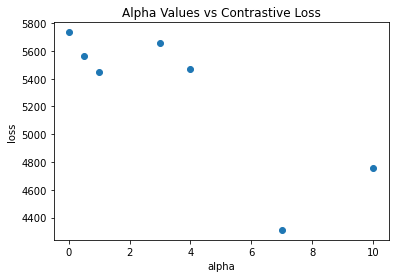

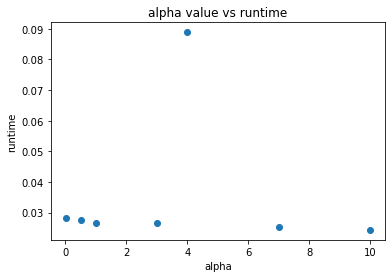

In [169]:
pylab.scatter(avals, qualities)
pylab.title('Alpha Values vs Contrastive Loss')
pylab.xlabel('alpha')
pylab.ylabel('loss')
pylab.show()


pylab.scatter(avals, times)
pylab.title('alpha value vs runtime')
pylab.xlabel('alpha')
pylab.ylabel('runtime')
pylab.show()


In [5]:
experiment_helpers.diffmap_coordinate_descent(testing_data, testing_labels)

0.5 13665.28053606181
150 13665.135077404546
alpha: 1.305166278062295
K Neighbors: 226.39320225002103
1.305166278062295 13665.28053606181
226.39320225002103 13665.135077404546
alpha: 1.305166278062295
K Neighbors: 226.39320225002103


In [7]:
loss = ContrastiveLoss()
start = time.time()
dmap=dm.DiffusionMap.from_sklearn(n_evecs = 2,epsilon = 1.0, alpha = 1.31, k=226)
diffused_points = dmap.fit_transform(testing_data)
end = time.time()

runtime = end-start

closs = loss.get_loss(diffused_points, testing_labels)

print('time' + str(runtime))
print('loss'+ str(closs))

time0.014852046966552734
loss13665.084613040766
